# This is sample code for regression model

Here the sample codes are shown for several regression model. Basic regression model is `LinearRegression`.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Sample data

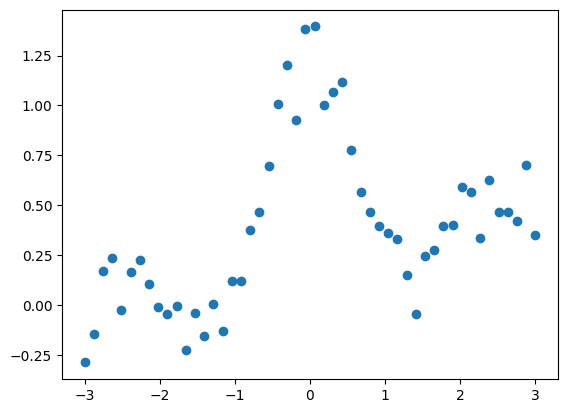

In [89]:
n = 50; N = 1000
x = np.linspace(-3, 3, n)
X = np.linspace(-3, 3, N)

np.random.seed(234)
y = np.sin(np.pi*x) / (np.pi*x) + 0.1*x + 0.4* np.random.random(n)

x = x.reshape(-1,1)
X = X.reshape(-1,1)
y = y.reshape(-1,1)

plt.scatter(x,y)
plt.show()


## Linear Regression

intercept: [0.39166125] coefficient: [[0.09510861]]
Score: 0.16460402247054173


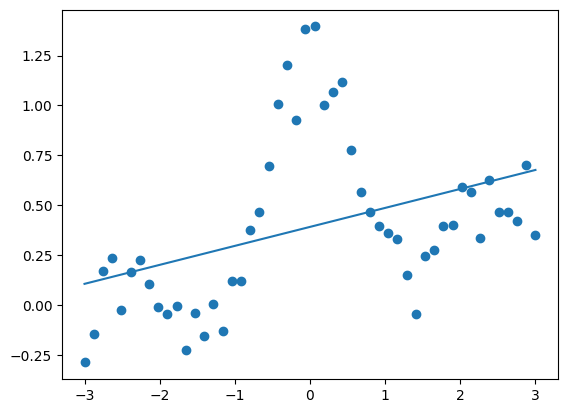

In [90]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x, y)
Y = reg.predict(X)

print(f'intercept: {reg.intercept_} coefficient: {reg.coef_}')
print(f'Score: {reg.score(x, y)}')
plt.scatter(x,y)
plt.plot(X,Y)
plt.show()



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     9.458
Date:                Thu, 27 Oct 2022   Prob (F-statistic):            0.00347
Time:                        22:11:06   Log-Likelihood:                -22.385
No. Observations:                  50   AIC:                             48.77
Df Residuals:                      48   BIC:                             52.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3917      0.055      7.167      0.0

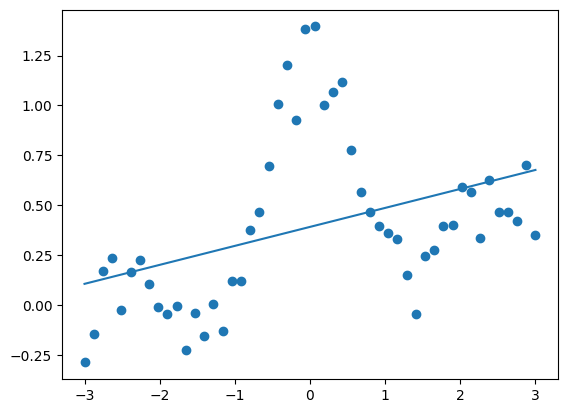

In [91]:
import statsmodels.api as sm

x_add = sm.add_constant(x) # 切片は全要素1.0の列を戦闘に追加
model = sm.OLS(y, x_add)
res = model.fit()
Y_pred = res.predict(sm.add_constant(X))

print(res.summary())
plt.scatter(x,y)
plt.plot(X,Y_pred)
plt.show()


## Kernel Ridge Regression

Kernel Ridge Regressionを行う前に、過学習を前提にカーネル回帰を行ってみる。

R2 score: 0.9656076087611415


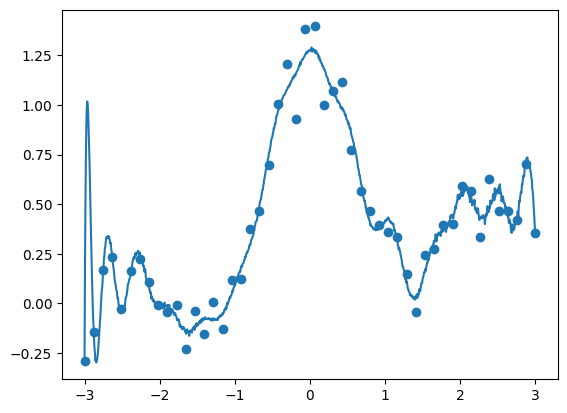

In [92]:
from sklearn.metrics.pairwise import rbf_kernel
kx = rbf_kernel(x, x)
kX = rbf_kernel(X, x)

klr = linear_model.LinearRegression()
klr.fit(kx, y)

ky_pred = klr.predict(kX)

print(f'R2 score: {klr.score(kx,y)}')
plt.scatter(x,y)
plt.plot(X,ky_pred)
plt.show()


次に、誤差として最小二乗に制約をつけた、KernelRidge回帰を行う。

R2 score: 0.8856524762384473


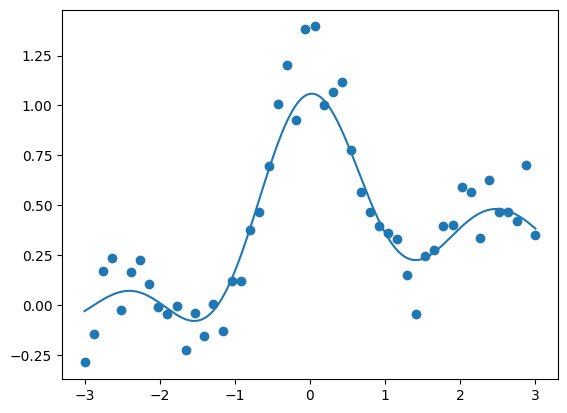

In [93]:
from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge(alpha=1.0, kernel='rbf')
krr.fit(x, y)
krr_pred = krr.predict(X)

print(f'R2 score: {krr.score(x,y)}')
plt.scatter(x,y)
plt.plot(X,krr_pred)
plt.show()


パラメータの最適値をGridSearchで探索する

Best KRR with params: {'alpha': 0.01, 'gamma': 1.0} and R2 score: 0.935


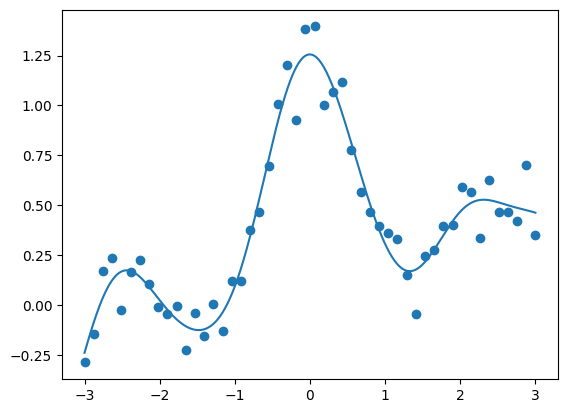

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

kr = GridSearchCV(
    KernelRidge(kernel="rbf", gamma=0.1),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
)

kr.fit(x,y)
y_kr = kr.predict(X)
print(f"Best KRR with params: {kr.best_params_} and R2 score: {r2_score(y,kr.predict(x)):.3f}")
plt.scatter(x,y)
plt.plot(X,y_kr)
plt.show()


## SVR (Support Vector Regression)

R2 score: 0.9233630191274795


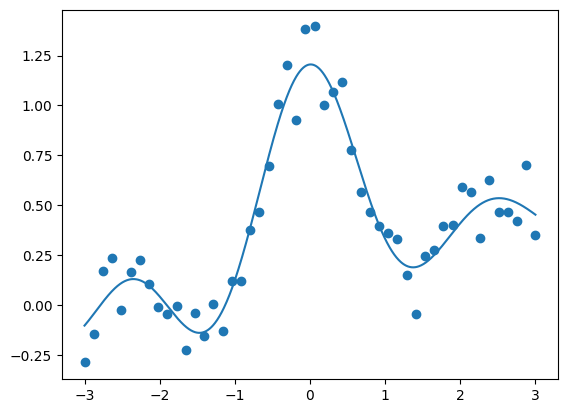

In [95]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', gamma=1.0)

svr.fit(x, y.ravel())
svr_pred = svr.predict(X)

print(f'R2 score: {svr.score(x,y)}')
plt.scatter(x,y)
plt.plot(X,svr_pred)
plt.show()

